# week 8 Update

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#check for outliers
joined_drop = pd.read_pickle('../data/week7.pkl')
joined_drop.retail

0          6.00
1          2.75
2         17.00
3         14.50
4         17.50
          ...  
220727    99.50
220728    99.50
220729    99.50
220730    99.50
220731    99.50
Name: retail, Length: 220276, dtype: float64

<Axes: ylabel='Density'>

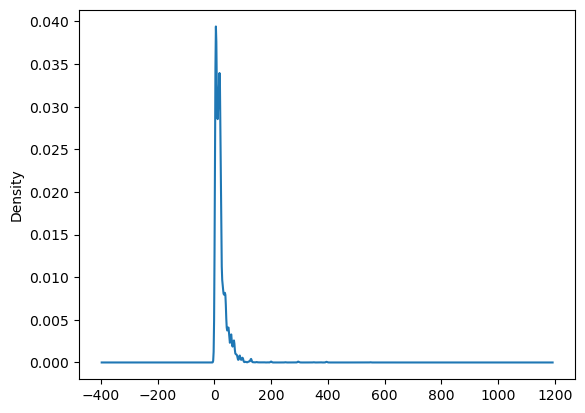

In [5]:
# plot the density plot of retail price
joined_drop.retail.plot.kde()

In [6]:
# find the outliers that are more than 3 standard deviations away from the mean
price_mean = joined_drop.retail.mean()
price_std = joined_drop.retail.std()

outliers = np.abs(joined_drop.retail - price_mean) > (3 * price_std)
joined_drop.retail[outliers]

657        99.0
658        99.0
659        99.0
1149      295.0
1150      295.0
          ...  
220727     99.5
220728     99.5
220729     99.5
220730     99.5
220731     99.5
Name: retail, Length: 2289, dtype: float64

We would use retail price to calculate the profit, although there are outliers in the retail price, but we would NOT deal with it because it is normal that Dillard sells different kind of priducts with wide range of prices. 

## continue to standardize all the scale 

### Color

### Convert color to upper letters and only keep english letters

In [7]:
joined_drop.color = joined_drop.color.str.replace(r'[^a-zA-Z]', '', regex=True).str.upper()

In [8]:
joined_drop.color.value_counts(dropna=False)

color
BLACK       22740
WHITE       15098
MULTI        3731
NAVY         3372
SILVER       2882
            ...  
GRNCB           1
MACAO           1
SUMABMQ         1
BRT             1
BLACKOLD        1
Name: count, Length: 6204, dtype: int64

### Top 20 colors

In [9]:
joined_drop.color.value_counts(dropna=False).head(20)

color
BLACK       22740
WHITE       15098
MULTI        3731
NAVY         3372
SILVER       2882
RED          2788
PINK         2684
BEIGE        2335
NEUTRAL      2165
BROWN        1996
ASST         1971
GOLD         1822
CLARIFY      1807
BLUE         1717
NOCOLOR      1548
EDPSPRAY     1482
             1416
IVORY        1356
EDTSPRAY     1319
NA           1227
Name: count, dtype: int64

### Top 20-40 colors

In [10]:
joined_drop.color.value_counts(dropna=False).head(40).tail(20)

color
CLEAR         1152
XMAS          1064
DDMLPUMP      1001
FAWN           918
RINSEOFF       840
JET            807
NUDE           797
ASSORTED       762
STONEWASH      755
KHAKI          740
VANILLA        720
GREEN          679
ONYX           674
INDIGO         650
ROSEBEIGE      636
ESPRESSO       635
MDBLUEM        634
BUFF           627
MULT           615
CANDLEGLOW     603
Name: count, dtype: int64

we need to standardize colors 
before cleaning, we have 8320 different colors.

In [11]:
# Define your color categories
color_categories = {
    'Black': ['BLACK', 'CHARCOAL', "BLKNAPPA"],
    'White': ['WHITE', 'BEIGE', 'IVORY', "LOVEYDOVE", 'OATMEAL', '100WHITE'],
    'Red': ['RED', 'BURGUNDY', 'MAROON',"BEETRED","650ROUGE"],  # Add variations of red here
    'Green': ['GREEN', 'LIME', 'OLIVE',"APPLEGREE"],   # Add variations of green here
    'Yellow': ['YELLOW', 'GOLD', 'AMBER', 'CANDLEGLOW'], # Add variations of yellow here
    'Blue': ['BLUE', 'NAVY', 'CYAN',"CHAMBRAYP", 'RINSEOFF', 'STONEWASH', 'INDIGO'],      # Add variations of blue here
    'Brown': ['BROWN', 'BEIGE', 'NEUTRAL', 'TAN', 'NUDE',
              'BRONZE',"ROSEWOOD", 'FAWN', 'ROSEBEIGE', 'ESPRESSO', 'MDBLUEM', 'BUFF'],   # Add variations of brown here
    'Orange': ['ORANGE', 'CORAL'],         # Add variations of orange here
    'Pink': ['PINK', 'FUCHSIA',"10BERRY"],           # Add variations of pink here
    'Purple': ['PURPLE', 'VIOLET'],        # Add variations of purple here
    'Grey': ['GREY', 'SILVER', 'CHARCOAL'],# Add variations of grey here
    "Silver":["SILVER"],
    "Nocolor":["NOCOLOR", 'CLEAR', 'CLARIFY'],
    "Multi":['MULTI', 'ASST', "STONEWASH",'ASSORTED',"CLAIR", 'XMAS', 'MULT'],
    'Fragrances': ['EDPSPRAY', 'EDTSPRAY']  # associated with fragrances or perfumes
}

# Function to map colors to categories with improved cleaning
def map_color_to_category(color):
    # Retain significant numbers or characters as needed
    color_cleaned = ''.join(filter(lambda c: c.isalpha() or c.isdigit(), color.upper()))
    for category, color_list in color_categories.items():
        for variation in color_list:
            if variation in color_cleaned:
                return category
    return 'Other'

# Apply the mapping function to the 'color' column
joined_drop['standardized_color'] = joined_drop['color'].apply(map_color_to_category)

joined_drop.head()

,sku,cost,retail,stype,quantity,orgprice,amt,style,color,size,packsize,vendor,brand,standardized_color
0,8936935,9.58,6.00,P,1,24.0,24.00,35-92 413641,WHEATNUBU,L,1,914938,KIDS HEA,Other
1,8940963,4.31,2.75,P,1,11.0,8.25,005 U61516,GREYHE,L,3,4012768,TOMMY HI,Grey
2,8944045,28.05,17.00,P,1,68.0,29.99,CC412,MULTI,M,1,8043525,KORET OF,Multi
3,8944045,25.00,14.50,P,1,58.0,29.00,CC412,MULTI,M,1,8043525,KORET OF,Multi
4,8972921,14.72,17.50,P,1,35.0,35.00,T-PIL TRA-QL,TERRA,BOU PIL,2,619402,STATUS Q,Other


In [12]:
#PICK SOME COLORS WE COULD PROCESS FURTHER, LEAVE THOSE WE COULD NOT RECOGNIZE
other_colors_df = joined_drop[joined_drop['standardized_color'] == "Other"]
other_colors_df

,sku,cost,retail,stype,quantity,orgprice,amt,style,color,size,packsize,vendor,brand,standardized_color
0,8936935,9.58,6.0,P,1,24.0,24.0,35-92 413641,WHEATNUBU,L,1,914938,KIDS HEA,Other
4,8972921,14.72,17.5,P,1,35.0,35.0,T-PIL TRA-QL,TERRA,BOU PIL,2,619402,STATUS Q,Other
5,8972921,14.72,17.5,P,1,35.0,35.0,T-PIL TRA-QL,TERRA,BOU PIL,2,619402,STATUS Q,Other
6,8972921,14.72,17.5,P,1,35.0,35.0,T-PIL TRA-QL,TERRA,BOU PIL,2,619402,STATUS Q,Other
7,8972921,14.72,17.5,P,1,35.0,35.0,T-PIL TRA-QL,TERRA,BOU PIL,2,619402,STATUS Q,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220727,8902921,87.66,99.5,P,1,199.0,199.0,COM TRA-K-,TERRA,K COMF,1,619402,STATUS Q,Other
220728,8902921,87.66,99.5,P,1,199.0,199.0,COM TRA-K-,TERRA,K COMF,1,619402,STATUS Q,Other
220729,8902921,87.66,99.5,P,1,199.0,199.0,COM TRA-K-,TERRA,K COMF,1,619402,STATUS Q,Other
220730,8902921,87.66,99.5,P,1,199.0,199.0,COM TRA-K-,TERRA,K COMF,1,619402,STATUS Q,Other


In [13]:
joined_drop.standardized_color.value_counts()

standardized_color
Other         102607
Black          29144
White          23506
Blue           14668
Brown          11260
Multi           9390
Red             5883
Grey            4943
Nocolor         4724
Pink            4694
Yellow          3463
Fragrances      2801
Green           1877
Purple           693
Orange           623
Name: count, dtype: int64

In [14]:
len(joined_drop.standardized_color.value_counts())

15

Now, we only have 15 different colors 

In [15]:
#no need to deal with
joined_drop.brand.value_counts()

brand
CLINIQUE    39210
LANCOME     16942
CABERNET    14782
LIZ CLAI     8889
LEVI STR     5638
            ...  
ADG/DESI        1
SUMMER S        1
WINSOME         1
BROOKINS        1
CONIFER         1
Name: count, Length: 678, dtype: int64

In [16]:
#no need to deal with
joined_drop.vendor.value_counts()

vendor
5511283    39210
113645     16114
13031       6370
3626213     5331
13396       4196
           ...  
21131          1
11536          1
8016222        1
2913323        1
1713319        1
Name: count, Length: 932, dtype: int64

### FIND WHAT COLORS CUSTOMERS LIKE TO BUY MOST/ THE COLORS WITH HIGHEST SALES REVENUE


### Size

In [17]:
joined_drop["size"].value_counts(dropna=False)

size
ALL           40955
L             10288
M              9952
NO SIZE        7852
XL             5646
              ...  
3D LG CANI        1
FOUND/CONC        1
SOUP/CEREA        1
JUG2PT.STF        1
SM.RECTRAY        1
Name: count, Length: 1764, dtype: int64

Before cleaning the size category, we have 1764 types of sizes.

In [18]:
np.sum(joined_drop['size'].apply(lambda x: not str(x).isnumeric()))

188151

In [19]:
joined_drop['size'].value_counts().head(10)

size
ALL        40955
L          10288
M           9952
NO SIZE     7852
XL          5646
7           5197
S           3980
ONE         3725
6           3631
5           3382
Name: count, dtype: int64

Mostly are not numerical size.

In [20]:
# Define your color categories
size_categories = {
    'Standard Sizes': ['S', 'M', 'L', 'XL', '7', '6', '5', '8', '9', '10', '11', '12', 'XXL'],
    'Special Codes': ['ALL', 'NO SIZE', 'ONE', '*DISC', 'QUICK EYE', '3.4 OZ', '4.2 OZ', '1.7 OZ', '1.7 OUNCES'],
    'Numeric Sizes': ['36C', '36', '34', '2', '3', '38C', '32', '38', '110M', '36D', '34C', '34B', '105M', '30', '065M', '38D', '36B', '16', '2.5'],
    'Alphanumeric Codes': ['01-BLACK', '080M', '085M', '090M', '095M', '100M', '075M', '070M'],
    'Product-Specific': ['4', 'WASH', 'BATH', 'HAND', 'DUAL FINIS', 'CS EYE', 'SUPERBAL', 'CS EYE', 'GAR', 'N/A', 'DISC', '#2 13.5 OZ', 'H IMPACT', 'W/DISH', 'LL SHINE', 'COMPACT', 'POWDER BLU', 'LIP DIFFER', 'LSH DBL M', 'LIP', '5PC PLSTG', 'FOAM CLNSR', 'MAKEUP', 'GLOSSWEAR', 'S SHAM', 'BLENDED', 'FLEXTEN', '38D', '#2  6 OZ', 'CREAM', '3X', '2XT', 'LE LIP', 'SQ PIL', '#3 12 OZ', '6.8 OZ', 'TOUCH BASE', '1X', 'LS CONC', 'TIP'],
}

# Function to map colors to categories with improved cleaning
def map_size_to_category(size):
    # Retain significant numbers or characters as needed
    for category, size_list in size_categories.items():
        for variation in size_list:
            if variation in size:
                return category
    return 'Other'

# Apply the mapping function to the 'color' column
joined_drop['standardized_size'] = joined_drop['size'].apply(map_size_to_category)

joined_drop.head()


,sku,cost,retail,stype,quantity,orgprice,amt,style,color,size,packsize,vendor,brand,standardized_color,standardized_size
0,8936935,9.58,6.00,P,1,24.0,24.00,35-92 413641,WHEATNUBU,L,1,914938,KIDS HEA,Other,Standard Sizes
1,8940963,4.31,2.75,P,1,11.0,8.25,005 U61516,GREYHE,L,3,4012768,TOMMY HI,Grey,Standard Sizes
2,8944045,28.05,17.00,P,1,68.0,29.99,CC412,MULTI,M,1,8043525,KORET OF,Multi,Standard Sizes
3,8944045,25.00,14.50,P,1,58.0,29.00,CC412,MULTI,M,1,8043525,KORET OF,Multi,Standard Sizes
4,8972921,14.72,17.50,P,1,35.0,35.00,T-PIL TRA-QL,TERRA,BOU PIL,2,619402,STATUS Q,Other,Standard Sizes


In [21]:
joined_drop["standardized_size"].value_counts()

standardized_size
Standard Sizes      180833
Numeric Sizes        12837
Special Codes         9115
Product-Specific      9061
Other                 8430
Name: count, dtype: int64

In [22]:
len(joined_drop.standardized_size.value_counts())

5

### Style

In [23]:
joined_drop["style"] = joined_drop["style"].str.strip()

In [24]:
joined_drop["style"].value_counts()

style
62A4            2057
2410            1803
645J            1741
75416           1580
8     F30G61    1369
                ... 
3603               1
R039TD             1
08    633626       1
56    BF9421       1
35-92 413641       1
Name: count, Length: 20909, dtype: int64

In [25]:
joined_drop["style"] = joined_drop["style"].str.replace(r'[^a-zA-Z0-9]', '', regex=True)

# Now, you can check the updated value counts
print(joined_drop["style"].value_counts())

style
62A4          2057
2410          1803
645J          1741
75416         1580
8F30G61       1369
              ... 
3603             1
R039TD           1
08633626         1
56BF9421         1
3592413641       1
Name: count, Length: 20909, dtype: int64


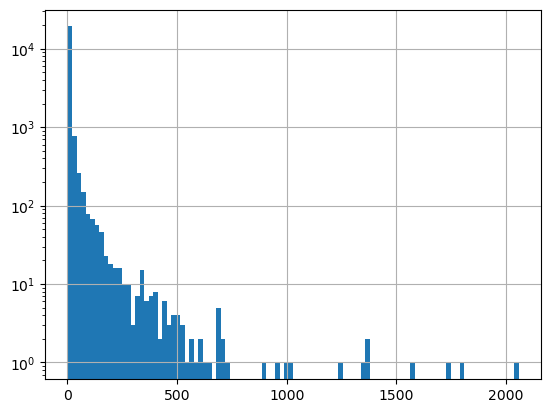

In [26]:
joined_drop["style"].value_counts().hist(bins=100, log=True);

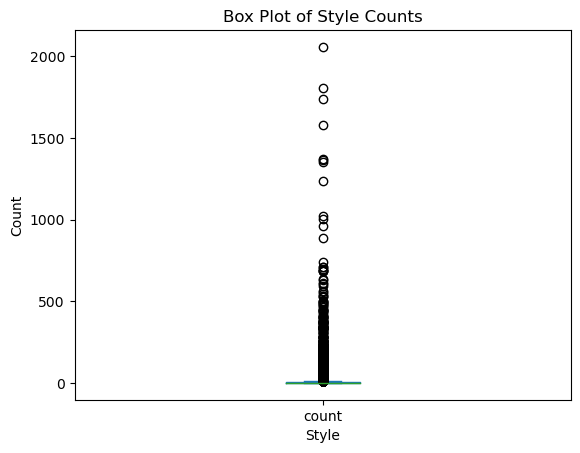

In [27]:
joined_drop["style"].value_counts().plot(kind='box')
plt.xlabel('Style')
plt.ylabel('Count')
plt.title('Box Plot of Style Counts');

In [28]:
joined_drop['style'].value_counts(dropna=False).head(10)

style
62A4       2057
2410       1803
645J       1741
75416      1580
8F30G61    1369
2228       1368
75415      1352
60QH       1239
61X9       1022
68LE       1001
Name: count, dtype: int64

We can see that most of the style counts shows a strong right skew. With our primary interesting in detecting the most charateristics of the most popular items, we are going generalize style as well.

In [29]:
style_categories = {
    'Numeric Styles': ['62A4', '2410', '645J', '75416', '2228', '75415', '60QH', '61X9', '68LE', '647J', '61EM', '12D028', '6121', '635P', '68A0', 'R314', '19D028', '670029', '689U', '6AJY', '1007', 'U7188', '617G', '618J', '634C', '006U64012', '6F0K', '6AL9', 'R111', '663E02', '6101', '64XF', '649G', '2977', '64MT', '16J708', '3008', '6362', '73014', '8864', '11D028', '780554', 'R316', '0F30G87', '064115184', '6120', '608E', 'U5304', '3845', '6339', '269115180', '276343111', '2534', '2704', 'R165', '6F0A', '635M01', '6126'],
    'Alphanumeric Styles': ['8F30G61', '61X9', '68LE', '61EM', 'R314', 'U7188', '617G', '618J', 'R111', '663E02', '64XF', '649G', '64MT', '16J708', '6362', '780554', 'R316', '0F30G87', '6120', '608E', 'U5304', '3845', '6339', 'R165', '6F0A', '635M01', '6126'],
    'Product-Specific Styles': ['546115185', '064115184', '269115180', '276343111'],
    'Length-Based Styles': ['64XF', '649G', '64MT', '16J708', '6362', '780554', 'R316', '0F30G87'],
    'Patterned Styles': ['8F30G61', '61X9', '68LE', '61EM', 'R314', 'U7188', '617G', '618J', 'R111', '663E02'],
    'Series Styles': ['12D028', '19D028', '670029', '689U', '2977', '11D028'],
    'Special Codes': ['006U64012', '546115185', '064115184', 'U5304'],
}

# Function to map style to categories with improved cleaning
def map_style_to_category(style):
    for category, style_list in style_categories.items():
        for variation in style_list:
            if variation in style:
                return category
    return 'Other'

# Apply the mapping function to the 'color' column
joined_drop['standardized_style'] = joined_drop['style'].apply(map_style_to_category)

joined_drop.head()

,sku,cost,retail,stype,quantity,orgprice,amt,style,color,size,packsize,vendor,brand,standardized_color,standardized_size,standardized_style
0,8936935,9.58,6.00,P,1,24.0,24.00,3592413641,WHEATNUBU,L,1,914938,KIDS HEA,Other,Standard Sizes,Other
1,8940963,4.31,2.75,P,1,11.0,8.25,005U61516,GREYHE,L,3,4012768,TOMMY HI,Grey,Standard Sizes,Other
2,8944045,28.05,17.00,P,1,68.0,29.99,CC412,MULTI,M,1,8043525,KORET OF,Multi,Standard Sizes,Other
3,8944045,25.00,14.50,P,1,58.0,29.00,CC412,MULTI,M,1,8043525,KORET OF,Multi,Standard Sizes,Other
4,8972921,14.72,17.50,P,1,35.0,35.00,TPILTRAQL,TERRA,BOU PIL,2,619402,STATUS Q,Other,Standard Sizes,Other


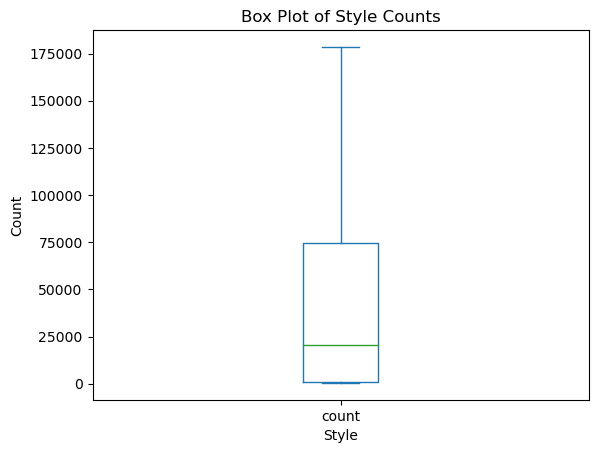

In [30]:
joined_drop["standardized_style"].value_counts().plot(kind='box')
plt.xlabel('Style')
plt.ylabel('Count')
plt.title('Box Plot of Style Counts');

In [31]:
joined_drop['standardized_style'].value_counts()

standardized_style
Other                      178486
Numeric Styles              39975
Alphanumeric Styles          1369
Product-Specific Styles       446
Name: count, dtype: int64

In [32]:
# save data to pickle for later processings
joined_drop.to_pickle('../data/week8.pkl')